In [214]:
import os
import random
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import gc
import pandas as pd
import math

from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [ ]:
os.mkdir('./dados')
os.mkdir('./img')

In [ ]:
pst_dados = os.path.abspath(os.path.relpath('./dados'))
pst_img = os.path.abspath(os.path.relpath('./img'))

In [215]:
microsoft = pd.read_csv('./dados/MSFT.csv')
google = pd.read_csv('./dados/GOOG.csv')
ibm = pd.read_csv('./dados/IBM.csv')
facebook = pd.read_csv('./dados/FB.csv')
oracle = pd.read_csv('./dados/ORCL.csv')
apple = pd.read_csv('./dados/AAPL.csv')

In [217]:
ibm.tail(10)
#google.Date[-100:]

,Date,Open,High,Low,Close,Adj Close,Volume
2758,2019-06-14,135.440002,135.880005,134.429993,135.149994,135.149994,2193300
2759,2019-06-17,135.389999,136.029999,134.699997,134.949997,134.949997,2194100
2760,2019-06-18,135.199997,137.190002,135.199997,136.380005,136.380005,2914700
2761,2019-06-19,136.429993,138.360001,136.240005,137.080002,137.080002,2382400
2762,2019-06-20,138.929993,139.539993,138.199997,138.850006,138.850006,3071000
2763,2019-06-21,138.440002,139.539993,138.389999,139.199997,139.199997,5288700
2764,2019-06-24,139.199997,140.149994,139.050003,139.350006,139.350006,2186000
2765,2019-06-25,139.460007,139.550003,138.130005,138.360001,138.360001,2801200
2766,2019-06-26,138.869995,139.679993,138.410004,138.520004,138.520004,2284600
2767,2019-06-27,138.720001,139.300003,137.949997,138.520004,138.520004,2149800


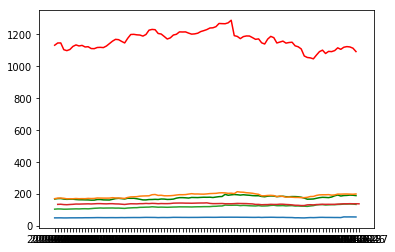

In [218]:
plt.plot(google.Date[-100:], google.High[-100:], color='red')
plt.plot(facebook.Date[-100:], facebook.High[-100:], color='green')
plt.plot(oracle.Date[-100:], oracle.High[-100:])
plt.plot(apple.Date[-100:], apple.High[-100:])
plt.plot(microsoft.Date[-100:], microsoft.High[-100:])
plt.plot(ibm.Date[-100:], ibm.High[-100:])

plt.show()

### Dividindo as bases em teste e treino na metade '0.5'

In [219]:
x_train_google, x_test_google, y_train_google, y_test_google = train_test_split(google['Date'], 
                                                                                google.drop('Date', axis=1), 
                                                                                test_size=0.5, 
                                                                                random_state=0)

x_train_facebook, x_test_facebook, y_train_facebook, y_test_facebook = train_test_split(facebook['Date'], 
                                                                                        facebook.drop('Date', axis=1), 
                                                                                        test_size=0.5, 
                                                                                        random_state=0)

x_train_ibm, x_test_ibm, y_train_ibm, y_test_ibm = train_test_split(ibm['Date'], 
                                                                    ibm.drop('Date', axis=1), 
                                                                    test_size=0.5,
                                                                    random_state=0)

x_train_oracle, x_test_oracle, y_train_oracle, y_test_oracle = train_test_split(oracle['Date'], 
                                                                                oracle.drop('Date', axis=1), 
                                                                                test_size=0.5,
                                                                                random_state=0)

x_train_apple, x_test_apple, y_train_apple, y_test_apple = train_test_split(apple['Date'], 
                                                                            apple.drop('Date', axis=1), 
                                                                            test_size=0.5,
                                                                            random_state=0)

x_train_microsoft, x_test_microsoft, y_train_microsoft, y_test_microsoft = train_test_split(microsoft['Date'], 
                                                                                            microsoft.drop('Date', axis=1), 
                                                                                            test_size=0.5,
                                                                                            random_state=0)

In [ ]:
y_train_google

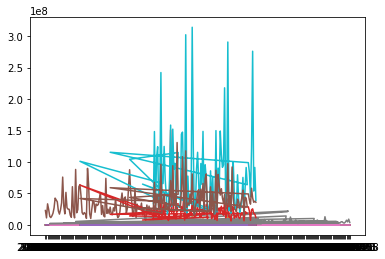

In [221]:
plt.plot(x_train_facebook[-100:], y_train_facebook[-100:])
plt.plot(x_train_google[-100:], y_train_google[-100:])
plt.plot(x_train_ibm[-100:], y_train_ibm[-100:])
plt.plot(x_train_oracle[-100:], y_train_oracle[-100:])
plt.plot(x_train_apple[-100:], y_train_apple[-100:])
plt.plot(x_train_microsoft[-100:], y_train_microsoft[-100:])

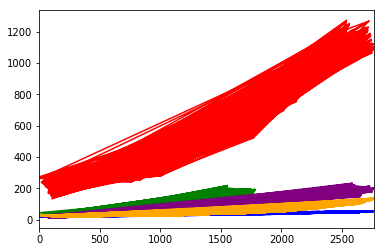

In [212]:
y_train_facebook.High.plot(color='green')
y_train_google.High.plot(color='red')
y_train_oracle.High.plot(color='blue')
y_train_apple.High.plot(color='purple')
y_train_microsoft.High.plot(color='orange')

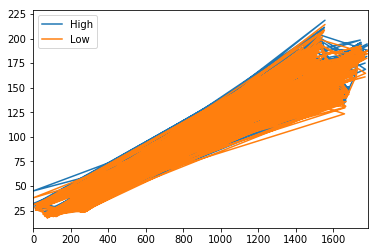

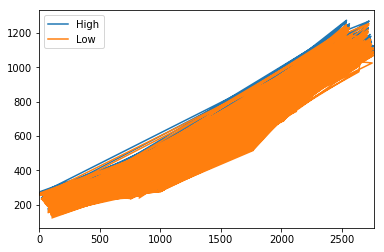

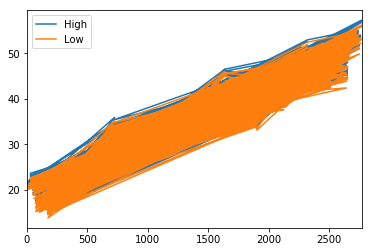

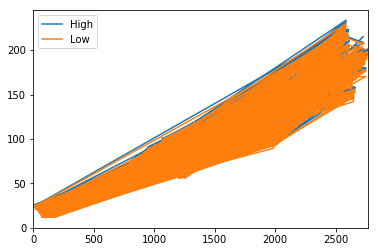

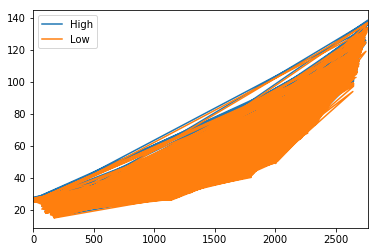

In [213]:
facebook_sem_vol = y_train_facebook.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()

facebook_sem_vol.plot()
y_train_google.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()
y_train_oracle.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()
y_train_apple.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()
y_train_microsoft.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()

<function matplotlib.pyplot.show>

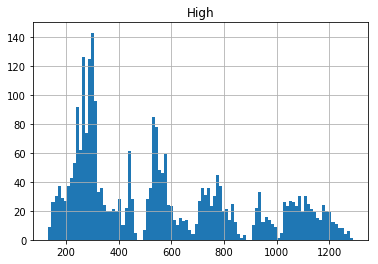

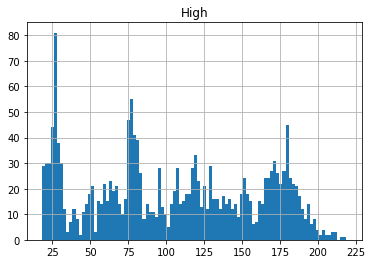

In [210]:
google.hist(column='High', bins=100)
facebook.hist(column='High', bins=100)
plt.show

In [271]:
y_train_google.High[103]

133.814667

In [237]:
y_train_google_pesos = y_train_google

In [272]:
y_train_google_pesos.High

In [267]:
for _ in y_train_google_pesos:
    print(y_train_google_pesos.High[:]*5)
    


73       849.201735
2212    4137.135010
1599    2774.245605
2458    5143.590090
312     1259.309385
1426    3040.797425
856     1520.833435
378     1554.862060
2539    6174.580080
154      928.486100
1216    2043.459320
772     1510.326845
2075    3944.649965
1944    3710.000000
930     1518.101195
2049    3904.049990
1757    2718.699950
308     1235.390015
1001    1426.248625
2694    6004.650270
143      768.377455
965     1535.016175
2343    4982.200010
1080    1891.000825
1405    2796.188355
632     1493.610535
1423    3030.688170
955     1622.298585
1421    2997.727660
178      813.359910
           ...     
2744    5729.865110
2008    3512.399900
99       770.389330
2496    5366.849975
1871    3879.775085
2046    3916.975100
755     1213.109895
976     1526.446990
2163    4006.250000
1940    3677.500000
2120    3897.650145
537     1216.761170
1701    2740.618285
2222    4380.249940
2135    3988.299865
2599    5539.450075
705     1439.263915
2362    5157.899780
2648    5354.199830


### multiplicando cada entrada por um peso

In [ ]:
y_train_google_pesos = y_train_google

for i in range(len(y_train_google)):
    if i in y_train_google_pesos.High:
        print('valor real {}, valor mult pelo peso {}'.format(round(y_train_google_pesos.High[i],5), round(y_train_google_pesos.High[i]*5,5)))
        y_train_google_pesos.High[i] = round(y_train_google.High[i]*5,5)
        y_train_google_pesos.Low[i] = round(y_train_google.Low[i]*4,5)
        y_train_google_pesos.Open[i] = round(y_train_google.Open[i]*3,5)
        y_train_google_pesos.Close[i] = round(y_train_google.Close[i]*6,5) 
        y_train_google_pesos.Volume[i] = round(y_train_google.Volume[i]*2,5)
  


valor real 234.9767, valor mult pelo peso 1174.8835
valor real 238.48886, valor mult pelo peso 1192.4443
valor real 240.43619, valor mult pelo peso 1202.18094
valor real 246.27322, valor mult pelo peso 1231.36612
valor real 250.14307, valor mult pelo peso 1250.71533
valor real 253.35219, valor mult pelo peso 1266.76094
valor real 243.36713, valor mult pelo peso 1216.83563
valor real 233.98317, valor mult pelo peso 1169.91585
valor real 239.53207, valor mult pelo peso 1197.66037
valor real 235.61256, valor mult pelo peso 1178.06282
valor real 225.00655, valor mult pelo peso 1125.03273
valor real 214.79298, valor mult pelo peso 1073.96492
valor real 210.8685, valor mult pelo peso 1054.3425
valor real 218.15114, valor mult pelo peso 1090.75569
valor real 218.97081, valor mult pelo peso 1094.85405
valor real 223.54605, valor mult pelo peso 1117.73026
valor real 217.16754, valor mult pelo peso 1085.83771
valor real 211.16656, valor mult pelo peso 1055.83282
valor real 203.66536, valor mult 

In [ ]:
y_train_google_pesos

In [ ]:
for itens in google.High:
    sigmoid = (1 / (1 + (math.exp(-itens))))
    print ('O valor de itens e: {}',format(-itens))
    print ('O valor da sigmoid é: {}',format(sigmoid))

In [ ]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
for i in media:
    print ('O valor de itens e: {}',format(-i))
    print ('O valor da sigmoid é: {}',format(sigmoid(i)))

In [16]:
lista1 = [1, 2, 3]

In [17]:
lista1[0]

1

In [19]:
lista2 = [[1,2,3], [4,5,6], [7,8,9]]

In [23]:
lista2[2][2]

9

In [25]:
lista2[0][1]

2

In [32]:
import random
cidades = ['Salto', 'Itu', 'Sorocaba', 'Campinas']
escolhido = random.choice(cidades)
escolhido

'Salto'

In [33]:
a = [1,2,3]

In [35]:
a.append(44)

In [36]:
a

[1, 2, 3, 44]

In [37]:
b = [5,6,88]

In [38]:
for item in b:
    a.append(item)
a

[1, 2, 3, 44, 5, 6, 88]

In [45]:
### lambda

In [39]:
media = lambda n1, n2, n3: (n1+n2+n3)/3

In [40]:
media(5, 8, 10)

7.666666666666667

## Estruturas de repetição de listas

In [44]:
kmH = [1,10,20,30,50,70,55,34,90,16,74]
print (kmH)

mH = []

for kms in kmH:
    mH.append(kms/1.61)
    
print (mH)

[1, 10, 20, 30, 50, 70, 55, 34, 90, 16, 74]
[0.6211180124223602, 6.211180124223602, 12.422360248447204, 18.633540372670808, 31.05590062111801, 43.47826086956521, 34.161490683229815, 21.11801242236025, 55.90062111801242, 9.937888198757763, 45.962732919254655]


### usando map

In [48]:
#list para que os resultados da func lambida se tornem uma lista tambem, pois os dados originais s~ao de uma lista

mph2 = list(map(lambda x: x/1.61, kmH)) #aplica a divisão para todos os itens de kmH usando a virgula para dividir

print (mph2)

[0.6211180124223602, 6.211180124223602, 12.422360248447204, 18.633540372670808, 31.05590062111801, 43.47826086956521, 34.161490683229815, 21.11801242236025, 55.90062111801242, 9.937888198757763, 45.962732919254655]


### list comprehension

In [53]:
#igual ao map e ao for anteriores

mph3 = [x/1.61 for x in kmH] #faz x/1.61 para todos os itens da lista kmH
print (mph3)

[0.6211180124223602, 6.211180124223602, 12.422360248447204, 18.633540372670808, 31.05590062111801, 43.47826086956521, 34.161490683229815, 21.11801242236025, 55.90062111801242, 9.937888198757763, 45.962732919254655]


In [55]:
# com string
texto = [char for char in 'Teste de list comprehension']
print(texto)

['T', 'e', 's', 't', 'e', ' ', 'd', 'e', ' ', 'l', 'i', 's', 't', ' ', 'c', 'o', 'm', 'p', 'r', 'e', 'h', 'e', 'n', 's', 's', 'i', 'o', 'n']


In [ ]:
kmH

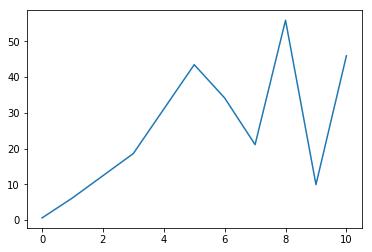

In [54]:
plt.plot(mph3)
plt.show()

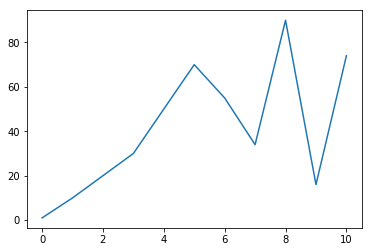

In [56]:
plt.plot(kmH)
plt.show()

# TESTES COM NUNPY

In [60]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [63]:
b = np.array([(2,6,9), (8,2,4), (8,2,5), (1,2,3), (9,8,7)]) #isso é uma matriz, cada um representa uma linha
b

array([[2, 6, 9],
       [8, 2, 4],
       [8, 2, 5],
       [1, 2, 3],
       [9, 8, 7]])

In [72]:
zero = np.zeros((10,8))
zero

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [73]:
um = np.ones((5,5))
um

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [76]:
# elementos na DIAGONAL da matriz
d = np.eye(10)
d

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [77]:
b.max()

9

In [79]:
b.min()

1

In [78]:
b.sum()

76

In [80]:
b.mean()

5.066666666666666

In [81]:
b.std() #desvio padrão std=standard, padrão

2.8394052585395806